## Lab Lecture 6: Analysis of the population receiving Food Stamps
#### Idea from Kamsey Agu, this was part of her CE 263N_Final Project 

In [8]:
#You will need:
!pip install geopandas==0.8.2
!pip install contextily
!pip install cenpy

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [9]:
import contextily
import geopandas
import cenpy
%matplotlib inline
acs = cenpy.products.ACS(2017)

In [10]:
vars_to_download = {
    "B02001_002E": "total_pop_white",     # Total white population
    "B02001_003E": "total_pop_black",     #Total black population
    "B01003_001E": "total_pop",           # Total population
    "B09019_001E": "hh_total",            # Total households
    "B15003_002E": "total_no_bachelor",      # Total w/o Bachelor degree
    "B01002_001E": "median_age",          # Median age
    "B19013_001E": "median_hh_income",     # Median household income 
    "B19058_001E": "SNAP_hh",              # Households receiving Food Stamps/SNAP 
    "B08015_001E": "access_to_vehicle"   # Workers over age 16 that drove alone to work by car, van, truck
}
vars_to_download_l = list(vars_to_download.keys())

http://cenpy-devs.github.io/cenpy/generated/cenpy.products.ACS.html

<image src="cenpy_methods.jpg"/>

Note that we can add data from county, place, metropolitan statistical area.

Source: http://cenpy-devs.github.io/cenpy/generated/cenpy.products.ACS.html

In [11]:
# Extracting census variables from Fulton County, GA
db = acs.from_county("Fulton, GA",
                  level="tract",
                  variables=vars_to_download_l
                 )

/usr/local/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1638: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/usr/local/lib/python3.9/site-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [12]:
db.head()

,GEOID,geometry,B01002_001E,B01003_001E,B02001_002E,B02001_003E,B08015_001E,B09019_001E,B15003_002E,B19013_001E,B19058_001E,NAME,state,county,tract
0,13121010400,"POLYGON ((-9445524.810 3963415.140, -9445427.0...",37.5,8290.0,3877.0,3970.0,2815.0,8290.0,107.0,50294.0,2662.0,"Census Tract 104, Fulton County, Georgia",13,121,010400
1,13121010512,"POLYGON ((-9412223.140 3972373.180, -9412195.5...",28.3,6497.0,240.0,6061.0,2235.0,6497.0,15.0,30819.0,2472.0,"Census Tract 105.12, Fulton County, Georgia",13,121,010512
2,13121010604,"POLYGON ((-9405103.470 3978853.000, -9405100.5...",35.3,2898.0,263.0,2342.0,990.0,2898.0,12.0,33133.0,1297.0,"Census Tract 106.04, Fulton County, Georgia",13,121,010604
3,13121008301,"POLYGON ((-9403317.910 3997890.800, -9403309.2...",40.3,2556.0,58.0,2487.0,505.0,2556.0,55.0,27023.0,927.0,"Census Tract 83.01, Fulton County, Georgia",13,121,008301
4,13121008102,"POLYGON ((-9406459.460 3995383.140, -9406444.4...",37.8,6876.0,193.0,6353.0,1395.0,6876.0,42.0,24940.0,2693.0,"Census Tract 81.02, Fulton County, Georgia",13,121,008102


In [13]:
len(db)

204

In [14]:
var_names = acs.variables\
               .reindex(vars_to_download)\
               [["label", "concept"]]\
               .reset_index()\
               .rename(columns={"index": "var_id"})
var_names["short_name"] = var_names["var_id"].map(vars_to_download)

In [15]:
## Option Droping NA
#db.loc[:, vars_to_download].dropna(axis=0)

In [16]:
filler = lambda col: col.fillna(col.mean())
db.loc[:, vars_to_download] = db.loc[:, vars_to_download]\
                                .apply(filler)

In [81]:
db.head()

,GEOID,median_age,total_pop,total_pop_white,total_pop_black,access_to_vehicle,hh_total,total_no_bachelor,median_hh_income,SNAP_hh,...,state,county,tract,area_sqkm,pct_no_bachelor,pct_black,pct_white,pct_SNAP,geometry,k4cls
0,13121010400,37.5,8290.0,3877.0,3970.0,2815.0,8290.0,107.0,50294.0,2662.0,...,13,121,010400,185.117124,0.012907,0.478890,0.467672,0.321110,"POLYGON ((-9445524.810 3963415.140, -9445427.0...",3
1,13121010512,28.3,6497.0,240.0,6061.0,2235.0,6497.0,15.0,30819.0,2472.0,...,13,121,010512,9.250057,0.002309,0.932892,0.036940,0.380483,"POLYGON ((-9412223.140 3972373.180, -9412195.5...",1
2,13121010604,35.3,2898.0,263.0,2342.0,990.0,2898.0,12.0,33133.0,1297.0,...,13,121,010604,4.741043,0.004141,0.808144,0.090752,0.447550,"POLYGON ((-9405103.470 3978853.000, -9405100.5...",1
3,13121008301,40.3,2556.0,58.0,2487.0,505.0,2556.0,55.0,27023.0,927.0,...,13,121,008301,2.628174,0.021518,0.973005,0.022692,0.362676,"POLYGON ((-9403317.910 3997890.800, -9403309.2...",1
4,13121008102,37.8,6876.0,193.0,6353.0,1395.0,6876.0,42.0,24940.0,2693.0,...,13,121,008102,7.233104,0.006108,0.923938,0.028069,0.391652,"POLYGON ((-9406459.460 3995383.140, -9406444.4...",1


In [17]:
db = db.rename(columns=vars_to_download)

In [18]:
db["area_sqkm"] = db.to_crs(epsg=5070).area / 1e6

In [19]:
db["pct_no_bachelor"] = db["total_no_bachelor"] / \
                  (db["total_pop"] + \
                   (db["total_pop"]==0) * 1
                  )

In [20]:
db["pct_black"] = db["total_pop_black"] / \
                  (db["total_pop"] + \
                   (db["total_pop"]==0) * 1
                  )

In [21]:
db["pct_white"] = db["total_pop_white"] / \
                  (db["total_pop"] + \
                   (db["total_pop"]==0) * 1
                  )

In [22]:
db["pct_SNAP"] = db["SNAP_hh"] / \
                  (db["hh_total"] + \
                   (db["hh_total"]==0) * 1
                  )

In [23]:
db.head()

,GEOID,geometry,median_age,total_pop,total_pop_white,total_pop_black,access_to_vehicle,hh_total,total_no_bachelor,median_hh_income,SNAP_hh,NAME,state,county,tract,area_sqkm,pct_no_bachelor,pct_black,pct_white,pct_SNAP
0,13121010400,"POLYGON ((-9445524.810 3963415.140, -9445427.0...",37.5,8290.0,3877.0,3970.0,2815.0,8290.0,107.0,50294.0,2662.0,"Census Tract 104, Fulton County, Georgia",13,121,010400,185.117124,0.012907,0.478890,0.467672,0.321110
1,13121010512,"POLYGON ((-9412223.140 3972373.180, -9412195.5...",28.3,6497.0,240.0,6061.0,2235.0,6497.0,15.0,30819.0,2472.0,"Census Tract 105.12, Fulton County, Georgia",13,121,010512,9.250057,0.002309,0.932892,0.036940,0.380483
2,13121010604,"POLYGON ((-9405103.470 3978853.000, -9405100.5...",35.3,2898.0,263.0,2342.0,990.0,2898.0,12.0,33133.0,1297.0,"Census Tract 106.04, Fulton County, Georgia",13,121,010604,4.741043,0.004141,0.808144,0.090752,0.447550
3,13121008301,"POLYGON ((-9403317.910 3997890.800, -9403309.2...",40.3,2556.0,58.0,2487.0,505.0,2556.0,55.0,27023.0,927.0,"Census Tract 83.01, Fulton County, Georgia",13,121,008301,2.628174,0.021518,0.973005,0.022692,0.362676
4,13121008102,"POLYGON ((-9406459.460 3995383.140, -9406444.4...",37.8,6876.0,193.0,6353.0,1395.0,6876.0,42.0,24940.0,2693.0,"Census Tract 81.02, Fulton County, Georgia",13,121,008102,7.233104,0.006108,0.923938,0.028069,0.391652


/usr/local/lib/python3.9/site-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/usr/local/lib/python3.9/site-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coo

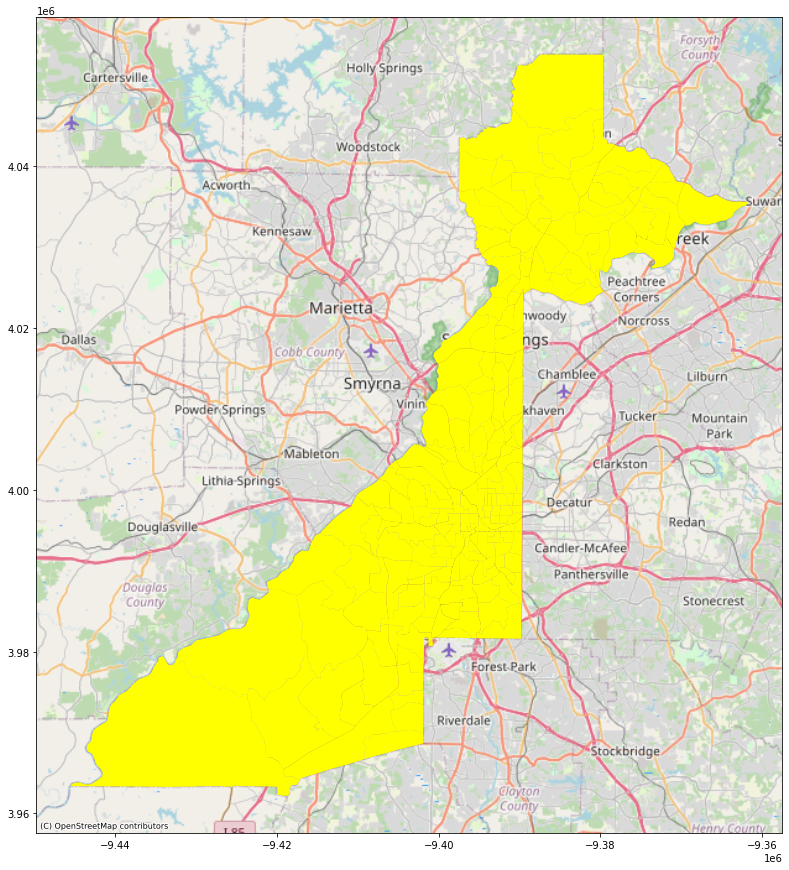

In [82]:
# Visualizing the food desert (my area of analysis)

ax = db.plot(figsize=(15, 15), alpha=0.2, color="k")
db.plot(ax=ax, color="yellow")
contextily.add_basemap(ax,source=contextily.providers.OpenStreetMap.Mapnik);
##source:https://contextily.readthedocs.io/en/latest/intro_guide.html

In [83]:
db.describe()

,median_age,total_pop,total_pop_white,total_pop_black,access_to_vehicle,hh_total,total_no_bachelor,median_hh_income,SNAP_hh,area_sqkm,pct_no_bachelor,pct_black,pct_white,pct_SNAP,k4cls
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,36.241872,4953.039216,2229.887255,2186.039216,1851.243781,4953.039216,24.602941,66844.262376,1920.833333,6.783384,0.006608,0.476051,0.425161,0.397742,1.671569
std,6.990583,2972.071006,2155.574353,2604.308540,1254.172915,2972.071006,30.511472,42419.178750,1098.389713,15.697038,0.014627,0.370914,0.328695,0.107856,0.990087
min,12.400000,0.000000,0.000000,0.000000,200.000000,0.000000,0.000000,9815.000000,0.000000,0.090578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.400000,2590.500000,246.000000,545.000000,821.250000,2590.500000,0.000000,31153.250000,1091.250000,1.467469,0.000000,0.114780,0.067616,0.335617,1.000000
50%,35.500000,4463.000000,1775.000000,1364.000000,1695.000000,4463.000000,16.000000,57066.500000,1834.000000,3.336304,0.004044,0.351557,0.474976,0.386730,1.000000
75%,40.300000,6091.500000,3832.500000,2488.000000,2502.500000,6091.500000,33.250000,93487.000000,2565.500000,6.853089,0.008075,0.905903,0.731651,0.447258,3.000000
max,67.900000,17958.000000,12255.000000,16075.000000,6555.000000,17958.000000,196.000000,200179.000000,6228.000000,185.117124,0.191176,1.000000,0.975895,0.808824,3.000000


In [84]:
db.to_csv('fulton.csv', index=False)

In [85]:
! rm -f atlanta_tracts.gpkg
db.to_file("atlanta.gpkg", driver="GPKG")

## Kmeans Clustering (Elbow Method and Silhouette Scores)

In [86]:
from esda.moran import Moran
import libpysal.weights.set_operations as Wsets
from libpysal.weights import Queen, KNN
import seaborn 
import pandas as pd
import geopandas 
import numpy
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv('fulton.csv')
df.head()

,GEOID,median_age,total_pop,total_pop_white,total_pop_black,access_to_vehicle,hh_total,total_no_bachelor,median_hh_income,SNAP_hh,...,state,county,tract,area_sqkm,pct_no_bachelor,pct_black,pct_white,pct_SNAP,geometry,k4cls
0,13121010400,37.5,8290.0,3877.0,3970.0,2815.0,8290.0,107.0,50294.0,2662.0,...,13,121,10400,185.117124,0.012907,0.478890,0.467672,0.321110,"POLYGON ((-9445524.810000001 3963415.14, -9445...",3
1,13121010512,28.3,6497.0,240.0,6061.0,2235.0,6497.0,15.0,30819.0,2472.0,...,13,121,10512,9.250057,0.002309,0.932892,0.036940,0.380483,"POLYGON ((-9412223.140000001 3972373.18, -9412...",1
2,13121010604,35.3,2898.0,263.0,2342.0,990.0,2898.0,12.0,33133.0,1297.0,...,13,121,10604,4.741043,0.004141,0.808144,0.090752,0.447550,"POLYGON ((-9405103.470000001 3978853, -9405100...",1
3,13121008301,40.3,2556.0,58.0,2487.0,505.0,2556.0,55.0,27023.0,927.0,...,13,121,8301,2.628174,0.021518,0.973005,0.022692,0.362676,"POLYGON ((-9403317.91 3997890.8, -9403309.23 3...",1
4,13121008102,37.8,6876.0,193.0,6353.0,1395.0,6876.0,42.0,24940.0,2693.0,...,13,121,8102,7.233104,0.006108,0.923938,0.028069,0.391652,"POLYGON ((-9406459.460000001 3995383.14, -9406...",1


In [90]:
# Selecting my cluster variables
df_Short = df[['pct_white', 'pct_black', 'pct_no_bachelor', 'SNAP_hh', 'median_age', 'median_hh_income']]

In [91]:
import sklearn.cluster as cluster

In [94]:
K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df_Short)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [93]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,3.655204e+11
1,2,1.133627e+11
2,3,4.939958e+10
3,4,2.551773e+10
4,5,1.803265e+10
5,6,1.107913e+10
6,7,8.458827e+09
7,8,6.819266e+09
8,9,5.696522e+09
9,10,4.576498e+09


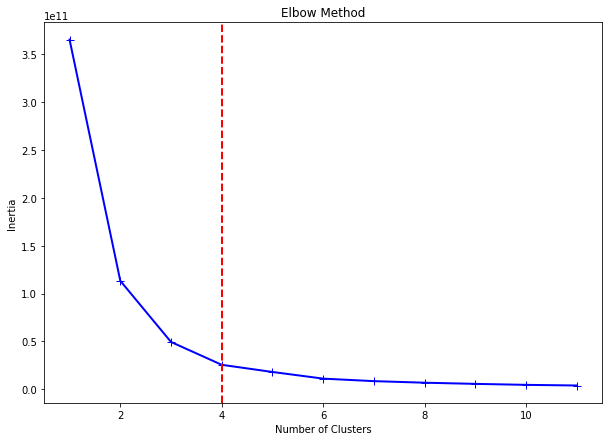

In [39]:
# Using elbow method to select the correct number of clusters

_ = plt.figure(figsize = (10,7))
_ = plt.plot(range(1,12), wss, linewidth = 2, color = 'blue', marker='+', markersize = 8)
_ = plt.title('Elbow Method', fontsize = 12)
_ = plt.xlabel('Number of Clusters',fontsize = 10)
_ = plt.ylabel('Inertia',fontsize = 10)

n_clusters = 4

_ = plt.axvline(x = n_clusters, linewidth = 2, color = 'red', linestyle = '--')
_ = plt.show()

In [40]:
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
from pylab import rcParams
import numpy as np
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

In [41]:
# Double-checking the correct number of c;lusters is chosen using silhouette scores

for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df_Short).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df_Short,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.630431881754244
Silhouette score for k(clusters) = 3 is 0.6142555103594586
Silhouette score for k(clusters) = 4 is 0.6088934881393732
Silhouette score for k(clusters) = 5 is 0.5838988236680109
Silhouette score for k(clusters) = 6 is 0.5922499532493751
Silhouette score for k(clusters) = 7 is 0.5636940531610772
Silhouette score for k(clusters) = 8 is 0.541277541925888
Silhouette score for k(clusters) = 9 is 0.5159586096059736
Silhouette score for k(clusters) = 10 is 0.5280272540066918
Silhouette score for k(clusters) = 11 is 0.5120271218626959
Silhouette score for k(clusters) = 12 is 0.53485961298189


In [95]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=200).fit(df_Short) for k in range(2,13)]

silhouette_scores = [silhouette_score(df_Short, model.labels_)
                    for model in kmeans_per_k[0:]]
silhouette_scores

[0.6304318817542441,
 0.6142555103594587,
 0.6088934881393735,
 0.5838988236680114,
 0.5922499532493758,
 0.5636940531610783,
 0.5412775419258891,
 0.5159586096059747,
 0.5280272540066927,
 0.5120271218626983,
 0.5348596129818912]

In [96]:
kmeans_per_k[0:]

[KMeans(n_clusters=2, random_state=200),
 KMeans(n_clusters=3, random_state=200),
 KMeans(n_clusters=4, random_state=200),
 KMeans(n_clusters=5, random_state=200),
 KMeans(n_clusters=6, random_state=200),
 KMeans(n_clusters=7, random_state=200),
 KMeans(random_state=200),
 KMeans(n_clusters=9, random_state=200),
 KMeans(n_clusters=10, random_state=200),
 KMeans(n_clusters=11, random_state=200),
 KMeans(n_clusters=12, random_state=200)]

k= 3   0.6142555103594587
k= 4   0.6088934881393735
k= 5   0.5838988236680114
k= 6   0.5922499532493758


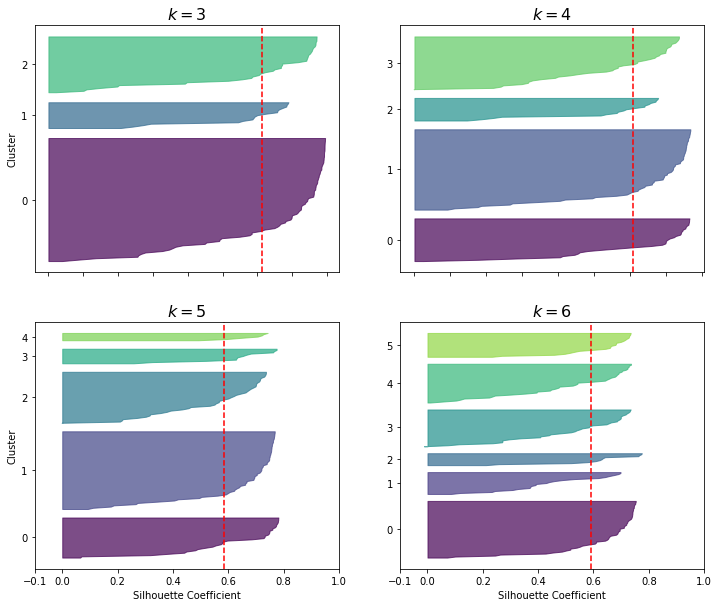

In [44]:
plt.figure(figsize=(12,10))

for k in (3,4,5,6):
    plt.subplot(2,2,k-2)
    
    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(df_Short, y_pred)
    
    padding = len(df_Short)//30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        
        color = mpl.cm.viridis(i/k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs)//2)
        pos += len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3,5):
        plt.ylabel('Cluster')
        
    if k in(5,6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel('Silhouette Coefficient')
        
    else:
        plt.tick_params(labelbottom=False)
        
    plt.axvline(x=silhouette_scores[k-2], color='red', linestyle='--')
    print('k=',k,' ',silhouette_scores[k-2])
    plt.title('$k={}$'.format(k), fontsize=16)
    
plt.show()

## Clustering and Segmentation from Geographic Data Science with Python 

In [97]:
db = geopandas.read_file('atlanta.gpkg')
db.columns


/usr/local/lib/python3.9/site-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


Index(['GEOID', 'median_age', 'total_pop', 'total_pop_white',
       'total_pop_black', 'access_to_vehicle', 'hh_total', 'total_no_bachelor',
       'median_hh_income', 'SNAP_hh', 'NAME', 'state', 'county', 'tract',
       'area_sqkm', 'pct_no_bachelor', 'pct_black', 'pct_white', 'pct_SNAP',
       'k4cls', 'geometry'],
      dtype='object')

In [98]:
cluster_variables =  [
    'pct_white',          # Percent of tract population that is white
    'pct_black',          # Percent of tract population that is black
    'pct_no_bachelor',       # Percent of tract population with a Bachelors degree
    'pct_SNAP',
    'median_age',         # Median age of tract population
    'median_hh_income'    # Median household income
]

/usr/local/lib/python3.9/site-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/usr/local/lib/python3.9/site-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coo

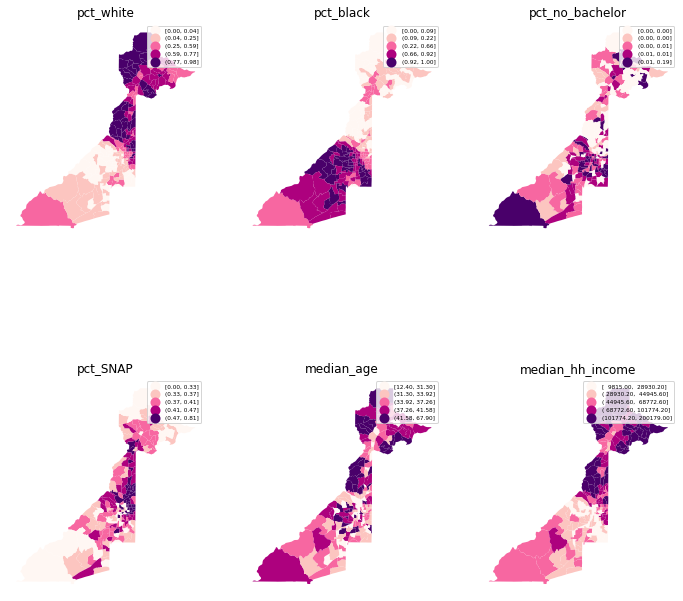

In [99]:
f, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(cluster_variables):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    db.plot(column=col, ax=ax, scheme='Quantiles', 
            linewidth=0, cmap='RdPu',legend=True,legend_kwds={'fontsize':'xx-small'})
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

## Measuring spatial autocorrelations

In [100]:
w = Queen.from_dataframe(db)

In [101]:
w.islands

[]

In [102]:
# Set seed for reproducibility
numpy.random.seed(123456)
# Calculate Moran's I for each variable
mi_results = [Moran(db[variable], w) for variable in cluster_variables]
table = pd.DataFrame([(variable, res.I, res.p_sim) \
                          for variable,res \
                          in zip(cluster_variables, mi_results)
                         ], columns=['Variable', "Moran's I", 'P-value']
                        )\
              .set_index('Variable')
table

,Moran's I,P-value
Variable,,
pct_white,0.868826,0.001
pct_black,0.890161,0.001
pct_no_bachelor,0.039838,0.061
pct_SNAP,0.238407,0.001
median_age,0.166408,0.001
median_hh_income,0.650458,0.001


## MEASURING VARIABLE CORRELATIONS

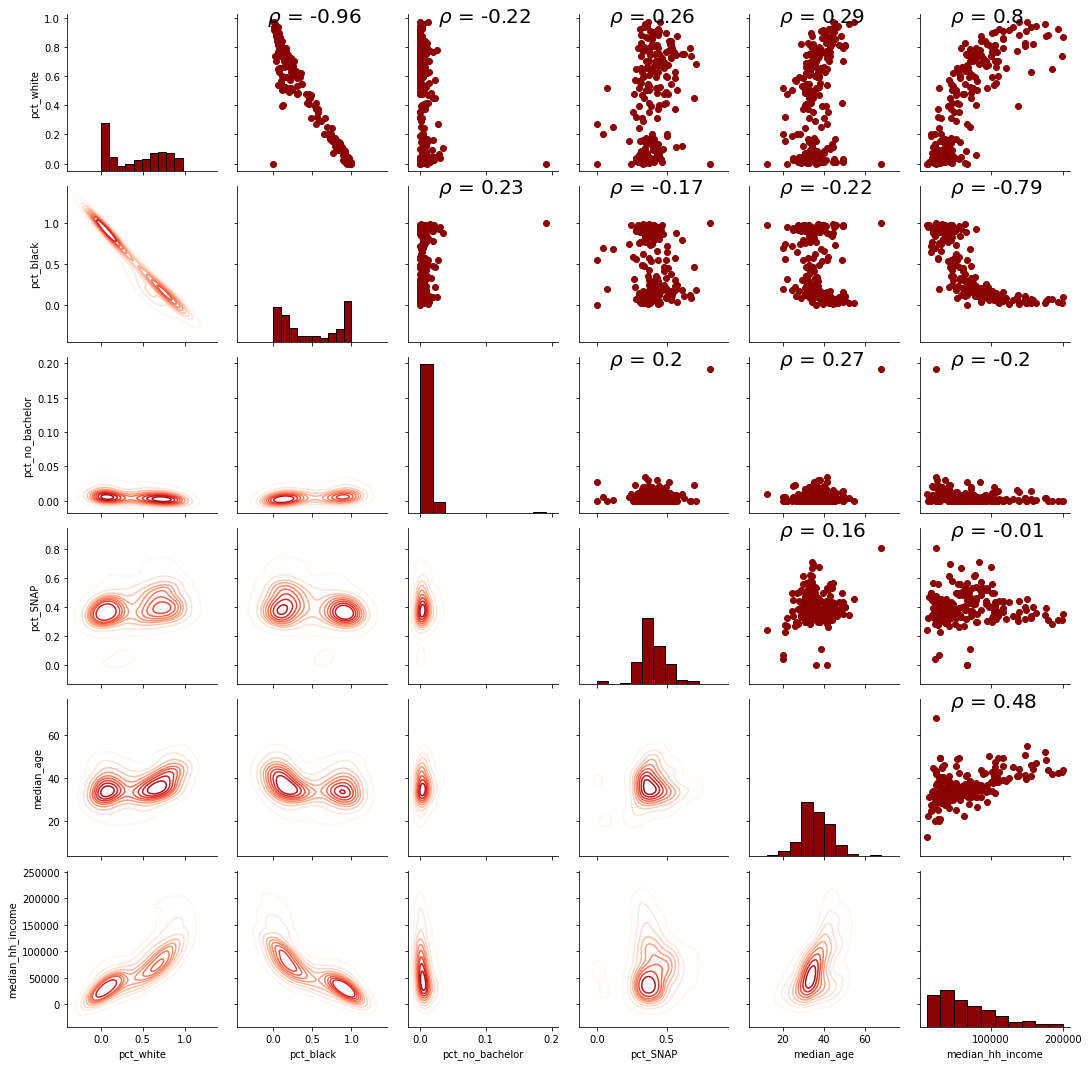

In [103]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)


grid = seaborn.PairGrid(db[cluster_variables])
# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(seaborn.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');
plt.savefig('PairGrid.png')
plt.show()

In [104]:
# Initialising KMeans instance
kmeans = KMeans(n_clusters=4)

In [105]:
numpy.random.seed(1234)
# Running K-Means algorithm
k4cls = kmeans.fit(db[cluster_variables])

In [106]:
k4cls.labels_

array([3, 0, 0, 0, 0, 3, 1, 3, 0, 3, 0, 3, 2, 0, 0, 3, 3, 1, 1, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 3, 2, 3, 3, 3, 2, 0, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 2, 3, 3, 2, 2, 0, 2,
       3, 3, 1, 2, 1, 2, 2, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 1, 2, 0, 2, 2, 3, 3, 2, 2, 0, 2, 0, 0, 3, 1, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 3, 3, 0, 1, 3, 3, 3, 2, 3, 1,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 0, 0, 2, 3, 0, 3, 2, 3, 2,
       2, 2, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 2, 3, 2, 0, 2,
       1, 1, 2, 1, 1, 3, 0, 3, 0, 0, 3, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2, 0,
       0, 3, 3, 1, 2, 1], dtype=int32)

In [107]:
k4cls.cluster_centers_

array([[1.27652093e-01, 8.21884220e-01, 1.03782879e-02, 3.82102881e-01,
        3.38344828e+01, 3.05794138e+04],
       [8.30623596e-01, 4.82216535e-02, 3.26863432e-03, 3.53007743e-01,
        4.45315789e+01, 1.62552000e+05],
       [7.65315908e-01, 1.01403055e-01, 3.47141468e-03, 4.24719416e-01,
        3.96150000e+01, 1.02675975e+05],
       [5.04012006e-01, 3.55829462e-01, 4.20831544e-03, 4.17249592e-01,
        3.48110668e+01, 6.51774746e+04]])

In [108]:
k4cls.inertia_

25301349274.203163

In [109]:
k4cls.n_iter_

4

/usr/local/lib/python3.9/site-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


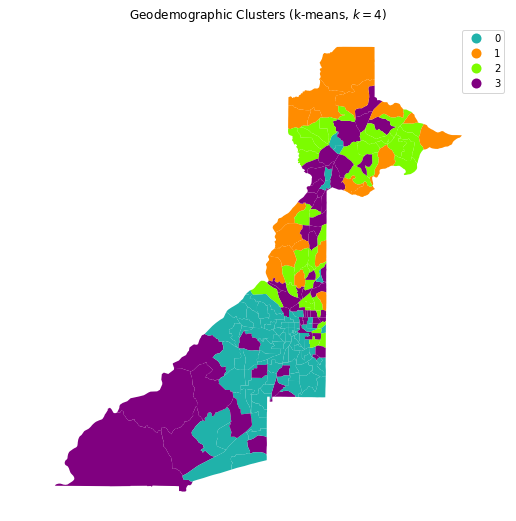

In [110]:
# Visualising clusters on the map

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cmapTrial = ListedColormap(["lightseagreen", "darkorange", "lawngreen", "purple"])
db['k4cls'] = k4cls.labels_
f, ax = plt.subplots(1, figsize=(9, 9))
db.plot(column='k4cls', cmap=cmapTrial, categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.title(r'Geodemographic Clusters (k-means, $k=4$)')
plt.show()

In [111]:
# Grouping data table by cluster label and count observations
k4sizes = db.groupby('k4cls').size()
k4sizes


k4cls
0    87
1    19
2    40
3    58
dtype: int64

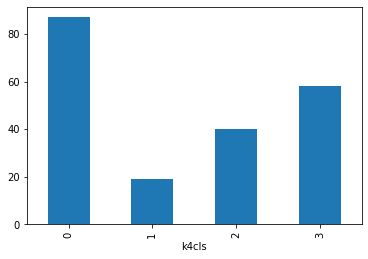

In [112]:
# cardinality
_ = k4sizes.plot.bar()

In [113]:
# Dissolve areas by Cluster, aggregate by summing, and keep column for area
areas = db.dissolve(by='k4cls', aggfunc='sum')['area_sqkm']
areas

/usr/local/lib/python3.9/site-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


k4cls
0    355.149451
1    243.458726
2    194.502643
3    590.699539
Name: area_sqkm, dtype: float64

<AxesSubplot:xlabel='k4cls'>

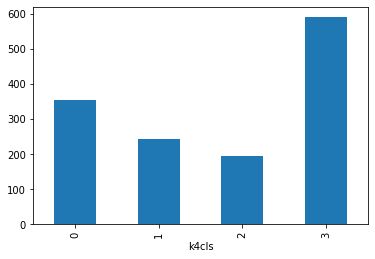

In [114]:
areas.plot.bar()

In [115]:
areas[3]/areas.sum()

0.42686451608603443

In [116]:
# Grouping table by cluster label
k4means = db.groupby('k4cls')[cluster_variables].mean()
k4means.T.round(3)

k4cls,0,1,2,3
pct_white,0.128,0.831,0.765,0.504
pct_black,0.822,0.048,0.101,0.356
pct_no_bachelor,0.010,0.003,0.003,0.004
pct_SNAP,0.382,0.353,0.425,0.417
median_age,33.834,44.532,39.615,34.811
median_hh_income,30579.414,162552.000,102675.975,65177.475


In [117]:
# Grouping table by cluster label, keep the variables used for clustering, and obtaining their descriptive summary
k4desc = db.groupby('k4cls')[cluster_variables].describe()
for cluster in k4desc.T:
    print('\n\t---------\n\tCluster %i'%cluster)
    print(k4desc.T[cluster].unstack())


	---------
	Cluster 0
                  count          mean          std          min           25%  \
pct_white          87.0      0.127652     0.157242     0.000000      0.021812   
pct_black          87.0      0.821884     0.199469     0.191483      0.777120   
pct_no_bachelor    87.0      0.010378     0.020931     0.000000      0.003814   
pct_SNAP           87.0      0.382103     0.102919     0.041799      0.331774   
median_age         87.0     33.834483     7.584881    12.400000     30.100000   
median_hh_income   87.0  30579.413793  9076.307694  9815.000000  24593.500000   

                           50%           75%           max  
pct_white             0.058947      0.160162      0.625127  
pct_black             0.908530      0.949826      1.000000  
pct_no_bachelor       0.006342      0.010154      0.191176  
pct_SNAP              0.372501      0.423992      0.808824  
median_age           33.300000     37.950000     67.900000  
median_hh_income  29276.000000  37519.00000

In [118]:
# Index db on cluster ID
tidy_db = db.set_index('k4cls')
tidy_db = tidy_db[cluster_variables]
tidy_db = tidy_db.stack()
tidy_db = tidy_db.reset_index()
tidy_db = tidy_db.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
tidy_db

,k4cls,Attribute,Values
0,3,pct_white,0.467672
1,3,pct_black,0.478890
2,3,pct_no_bachelor,0.012907
3,3,pct_SNAP,0.321110
4,3,median_age,37.500000
...,...,...,...
1219,1,pct_black,0.063329
1220,1,pct_no_bachelor,0.000000
1221,1,pct_SNAP,0.280559
1222,1,median_age,41.700000


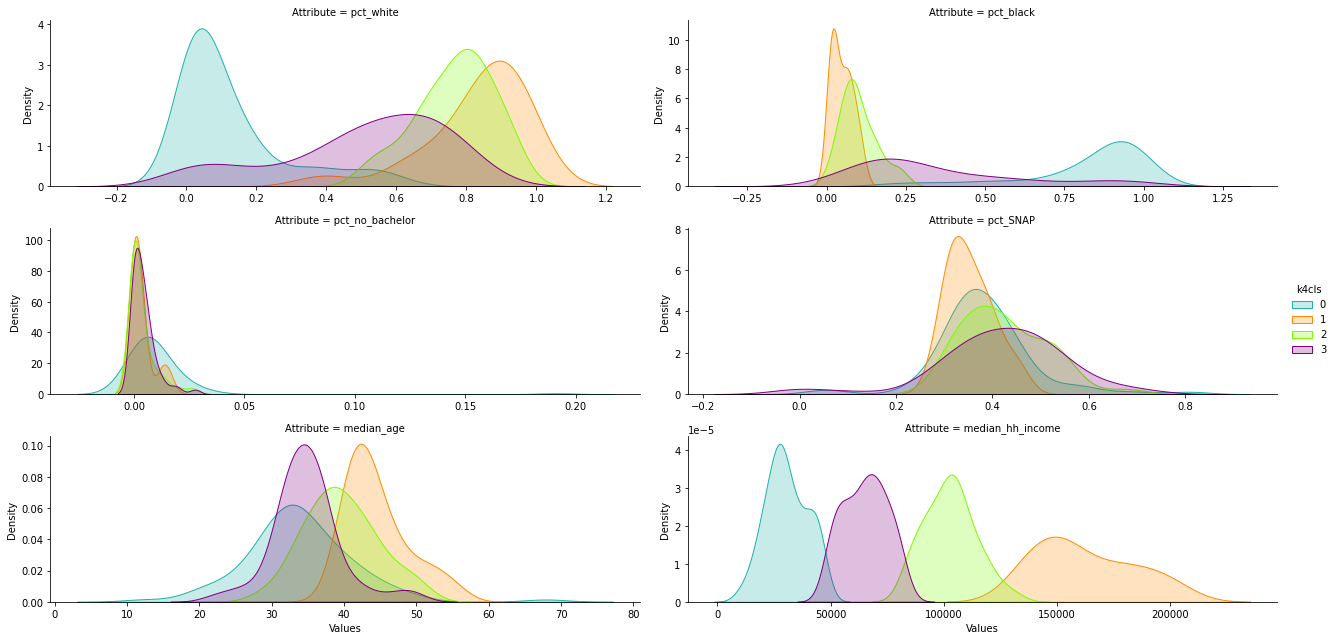

In [119]:
# Setup the facets

color = {0:"lightseagreen", 1:"darkorange", 2:"lawngreen", 3:"purple"}
facets = seaborn.FacetGrid(data=tidy_db, col='Attribute', palette=color, hue='k4cls', \
                  sharey=False, sharex=False, aspect=3, col_wrap=2)

_ = facets.map(seaborn.kdeplot, 'Values', shade=True).add_legend()

## EXAMPLE CLUSTERING IF CHOOSING DIFFERENT VARIABLES

In [120]:
# Selecting other cluster variables without treatment
df_Short2 = df[['total_pop_white', 'total_pop_black', 'access_to_vehicle', 'SNAP_hh', 'median_age', 'median_hh_income']]


In [121]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=200).fit(df_Short2) for k in range(2,13)]

silhouette_scores = [silhouette_score(df_Short, model.labels_)
                    for model in kmeans_per_k[0:]]
silhouette_scores

[0.6304318817542441,
 0.6142555103594587,
 0.6088934881393735,
 0.5833676403052315,
 0.5922499532493758,
 0.5639021622238737,
 0.5404493465835145,
 0.5097525353695092,
 0.5216534392961754,
 0.5139512040440742,
 0.5278939615273229]

k= 3   0.6142555103594587
k= 4   0.6088934881393735
k= 5   0.5833676403052315
k= 6   0.5922499532493758


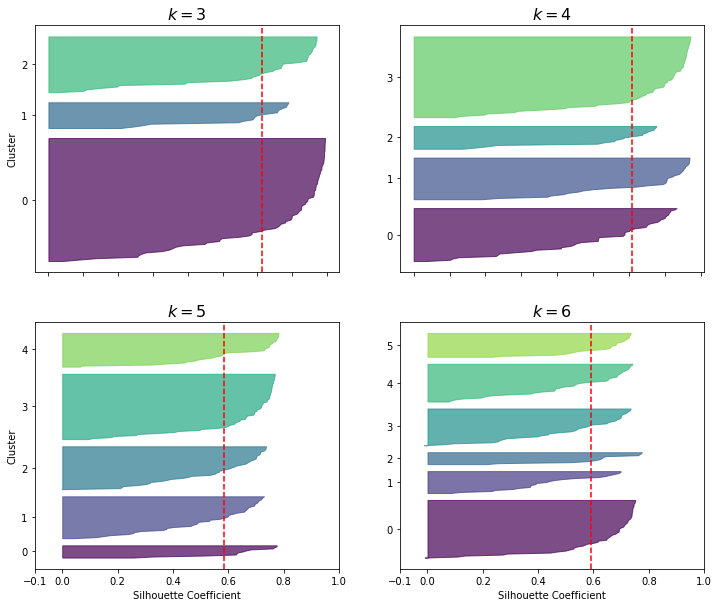

In [122]:
plt.figure(figsize=(12,10))

for k in (3,4,5,6):
    plt.subplot(2,2,k-2)
    
    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(df_Short, y_pred)
    
    padding = len(df_Short)//30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        
        color = mpl.cm.viridis(i/k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs)//2)
        pos += len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3,5):
        plt.ylabel('Cluster')
        
    if k in(5,6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel('Silhouette Coefficient')
        
    else:
        plt.tick_params(labelbottom=False)
        
    plt.axvline(x=silhouette_scores[k-2], color='red', linestyle='--')
    print('k=',k,' ',silhouette_scores[k-2])
    plt.title('$k={}$'.format(k), fontsize=16)
    
plt.show()

In [123]:
cluster_variables2 =  [
    'total_pop_white',          # Pop of tract population that is white
    'total_pop_black',          # Pop of tract population that is black
    'access_to_vehicle',       # Pop with access to Vehicles
    'SNAP_hh',               #HH with SNAP
    'median_age',         # Median age of tract population
    'median_hh_income'    # Median household income
]

'total_pop_white', 'total_pop_black', 'access_to_vehicle', 'SNAP_hh', 'median_age', 'median_hh_income'

('total_pop_white',
 'total_pop_black',
 'access_to_vehicle',
 'SNAP_hh',
 'median_age',
 'median_hh_income')

/usr/local/lib/python3.9/site-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/usr/local/lib/python3.9/site-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coo

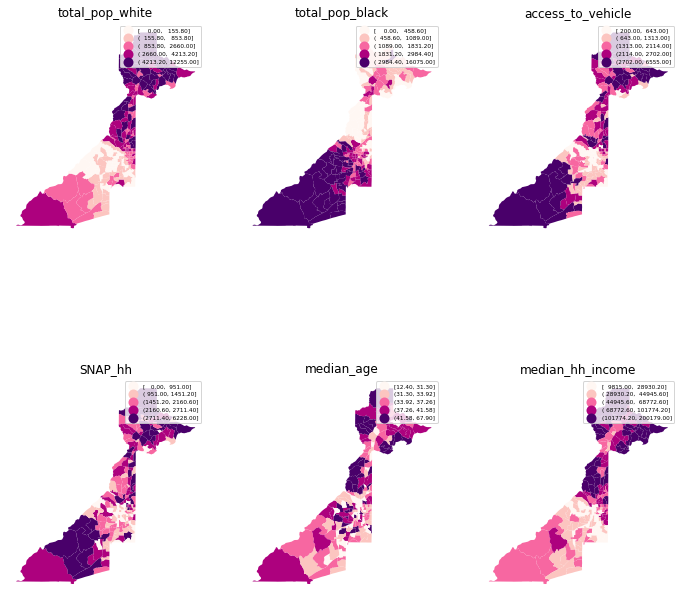

In [124]:
f, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(cluster_variables2):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    db.plot(column=col, ax=ax, scheme='Quantiles', 
            linewidth=0, cmap='RdPu',legend=True,legend_kwds={'fontsize':'xx-small'})
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

In [125]:
# Initialising KMeans instance
kmeans = KMeans(n_clusters=4)

In [126]:
numpy.random.seed(1234)
# Running K-Means algorithm
k4cls = kmeans.fit(db[cluster_variables2])

/usr/local/lib/python3.9/site-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


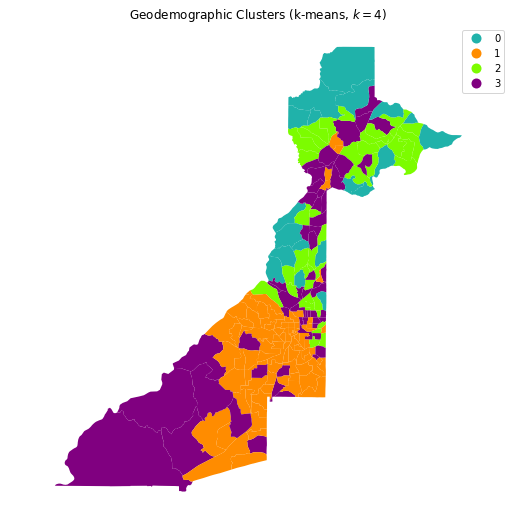

In [127]:
# Visualising clusters on the map

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cmapTrial = ListedColormap(["lightseagreen", "darkorange", "lawngreen", "purple"])
db['k4cls'] = k4cls.labels_
f, ax = plt.subplots(1, figsize=(9, 9))
db.plot(column='k4cls', cmap=cmapTrial, categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.title(r'Geodemographic Clusters (k-means, $k=4$)')
plt.show()

In [128]:
# Grouping table by cluster label
k4means = db.groupby('k4cls')[cluster_variables2].mean()
k4means.T.round(3)

k4cls,0,1,2,3
total_pop_white,5005.368,571.184,3982.925,2599.741
total_pop_black,323.316,3222.943,546.400,2371.672
access_to_vehicle,2361.053,1113.118,2314.125,2472.198
SNAP_hh,2138.842,1493.149,2167.725,2320.672
median_age,44.532,33.834,39.615,34.811
median_hh_income,162552.000,30579.414,102675.975,65177.475


In [129]:
# Index db on cluster ID
tidy_db = db.set_index('k4cls')
tidy_db = tidy_db[cluster_variables2]
tidy_db = tidy_db.stack()
tidy_db = tidy_db.reset_index()
tidy_db = tidy_db.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
tidy_db

,k4cls,Attribute,Values
0,3,total_pop_white,3877.0
1,3,total_pop_black,3970.0
2,3,access_to_vehicle,2815.0
3,3,SNAP_hh,2662.0
4,3,median_age,37.5
...,...,...,...
1219,0,total_pop_black,272.0
1220,0,access_to_vehicle,1605.0
1221,0,SNAP_hh,1205.0
1222,0,median_age,41.7


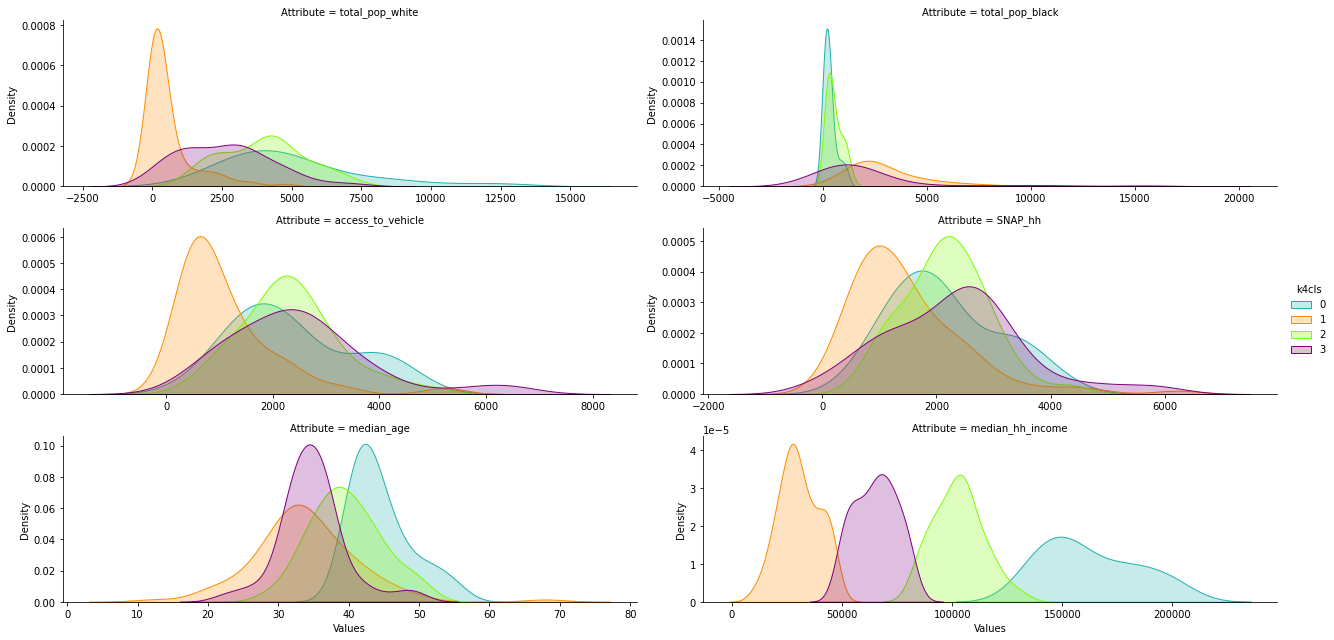

In [130]:
# Setup the facets

color = {0:"lightseagreen", 1:"darkorange", 2:"lawngreen", 3:"purple"}
facets = seaborn.FacetGrid(data=tidy_db, col='Attribute', palette=color, hue='k4cls', \
                  sharey=False, sharex=False, aspect=3, col_wrap=2)

_ = facets.map(seaborn.kdeplot, 'Values', shade=True).add_legend()